# What is camelot ?
Camelot is a Python library that can help you extract tables from PDFs!

## Why Camelot is used ?
Camelot gives you control over the table extraction process with its tweakable settings.<br>
Bad tables can be discarded based on metrics like accuracy and whitespace, without having to manually look at each table.<br>
Each table is extracted into a pandas DataFrame.

## Install

In [1]:
pip install ghostscript

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ctypes.util import find_library

In [3]:
print(find_library("gs"))

None


In [4]:
pip install camelot-py[plot]                              #for visual debugging  

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#for'


In [5]:
pip install "camelot-py[dev]"

Note: you may need to restart the kernel to use updated packages.


## Import

In [1]:
import camelot

## .read_pdf()
reads the data from the tables of the pdf file of the given address

In [2]:
tables = camelot.read_pdf('collage_pdf.pdf')   

tables                                                   #will return of table list n=1 as only one page is choosen by default

<TableList n=1>

In [3]:
tabless = camelot.read_pdf('collage_pdf.pdf',pages="all")   

tabless                                                     #will return pages you specified "n" denotes no of pages

<TableList n=46>

## tables[index].df
points towards the desired table of a given index

In [4]:
tables[0].df   

# print the first table as Pandas DataFrame

,0,1,2,3,4,5,6,7,8,9
0,S. \nNo.,"UGC, \nCRO \nCollege Name\nAddress\nCode",,,District,Pin Code,State,Status \n(Govt./ \nPrivate),Self-\nfinancing/unaid\ned/ aided,Phone No.
1,,"1.Awadesh Pratap Singh University, Rewa (M.P.)",,,,,,,,
2,1,101001 Arts Degree College,,Sirmour,Rewa,486448,Madhya \nPradesh,Private,Aided,07660-260626
3,2,101002 Arts Degree College,,Semaria,Rewa,486445,Madhya \nPradesh,Private,Un-Aided,07660-266503
4,3,101003,Govt. Arts & Commerce Degree \nCollege,At. & P.O. Beohari,Shahdol,484774,Madhya \nPradesh,Govt.,Aided,07650-262235
5,4,101004,"Govt. Arts, Commerce & Science \nCollege",Rampur Naikin,Sidhi,486775,Madhya \nPradesh,Govt.,Aided,07802-280879
6,5,101005 Govt. College,,Station Road,Satna,485001,Madhya \nPradesh,Govt.,Aided,07672-223209
7,6,101006 Govt. College,,Churhat,Sidhi,486771,Madhya \nPradesh,Govt.,Aided,
8,7,101007 Govt. R.V.P.S. Degree College,,Shahpura Road,Umaria,484661,Madhya \nPradesh,Govt.,Aided,07653-222230
9,8,101008 Govt. College,,Birsinghpur Pali,Umaria,484551,Madhya \nPradesh,Govt.,Aided,


Note : Camelot only works with text-based PDFs and not scanned documents.

### Parsing report

In [5]:
tables[0].parsing_report

{'accuracy': 95.3, 'whitespace': 14.71, 'order': 1, 'page': 1}

### .export()
It creates compressed folder 'name' taken from ("name.csv") which contains all files of all tables extracted from every pdf page.

In [6]:
tables.export("foo.csv", f="csv", compress=True)

### to_json, to_excel, to_html
used to convert specific table[x] 

In [7]:
tables[0].to_csv('foo.csv')                   

## Advanced Usage

### Process background lines
To detect line segments, Lattice needs the lines that make the table to be in the foreground.

In [8]:
tables = camelot.read_pdf('background_lines.pdf',process_background=True)            #if its not mentioned then we unable to fetch table
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


## Visual debugging
plot() method is used to generate elements that were detected on the PDF page. This can help you select table areas, column separators and debug bad table outputs, by tweaking different configuration parameters.
The following plot types are supported with kind arg: ‘text’ ,‘grid’, ‘contour’, ‘line’, ‘joint’, ‘textedge’.

### text
plot all the text present on the table’s PDF page.

<ipython-input-9-13028f93d07a>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='text').show()


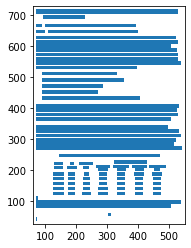

In [9]:
tables = camelot.read_pdf('foo.pdf')
camelot.plot(tables[0], kind='text').show()

The x-y coordinates change as you move your mouse cursor on the image, which can help you note coordinates.

### table
 plot the table (to see if it was detected correctly or not).

<ipython-input-10-f0d5ddba687e>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='grid').show()


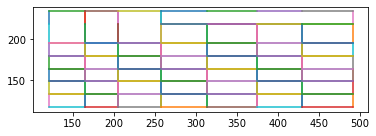

In [10]:
camelot.plot(tables[0], kind='grid').show()

### contour
plot all table boundaries present on the table’s PDF page.

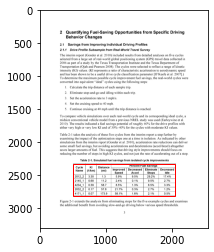

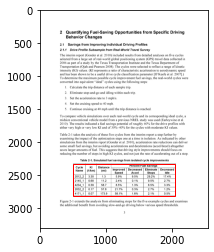

In [11]:
camelot.plot(tables[0], kind='contour')

### line
plot all line segments present on the table’s PDF page.

<ipython-input-12-1fcb01d35d05>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='line').show()


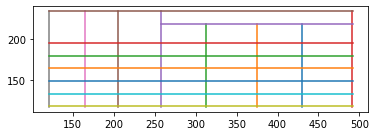

In [12]:
camelot.plot(tables[0], kind='line').show()

### joint
plot all line intersections present on the table’s PDF page.

<ipython-input-13-1485c6069593>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='joint').show()


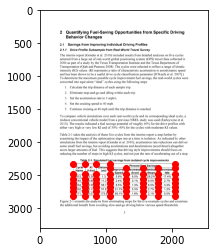

In [13]:
camelot.plot(tables[0], kind='joint').show()

### textedge
visualize the textedges found on a page.

<ipython-input-14-eefb68fafa8b>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(table[0],kind='textedge').show()                 #textedge supports by stream flavor only


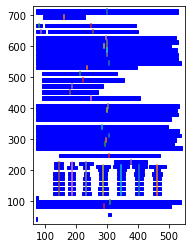

In [14]:
table = camelot.read_pdf('foo.pdf',flavor='stream')
camelot.plot(table[0],kind='textedge').show()                 #textedge supports by stream flavor only

## Specify table areas
In some cases, it can be useful to specify exact table boundaries. You can plot the text on this page and note the top left and bottom right coordinates of the table.Table areas that you want Camelot to analyze can be passed as a list of comma-separated strings to read_pdf(), using the table_areas keyword argument

In [15]:
tables = camelot.read_pdf('table_areas.pdf', flavor='stream', table_areas=['316,499,566,337'])
tables[0].df

,0,1
0,,One Withholding
1,Payroll Period,Allowance
2,Weekly,$\n71.15
3,Biweekly,142.31
4,Semimonthly,154.17
5,Monthly,308.33
6,Quarterly,925.00
7,Semiannually,"1,850.00"
8,Annually,"3,700.00"
9,Daily or Miscellaneous,14.23


Note : table_areas accepts strings of the form x1,y1,x2,y2 where (x1, y1) -> top-left and (x2, y2) -> bottom-right in PDF coordinate space. In PDF coordinate space, the bottom-left corner of the page is the origin, with coordinates (0, 0).

## Specify table regions
There case of table inside table or  where the table might not lie at the exact coordinates every time but in an approximate region.

You can use the table_regions keyword argument to read_pdf() to solve for such cases. When table_regions is specified, Camelot will only analyze the specified regions to look for tables

In [16]:
tables = camelot.read_pdf('table_regions.pdf', table_regions=['170,370,560,270'])
#camelot.plot(tables[0], kind='text').show()
tables[0].df

,0,1
0,Età dell’Assicurato \nall’epoca del decesso,Misura % di \nmaggiorazione
1,18-75,"1,00%"
2,76-80,"0,50%"
3,81 in poi,"0,10%"


## Specify column separators
where the text is very close to each other, it is possible that Camelot may guess the column separators’ coordinates incorrectly. To correct this, you can explicitly specify the x coordinate for each column separator by plotting the text on the page.

For example, if you have specified two table areas, table_areas=['12,54,43,23', '20,67,55,33'], and only want to specify column separators for the first table, you can pass an empty string for the second table in the column separators’ list like this, columns=['10,120,200,400', ''].

In [17]:
tables = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,,FEBRUARY 2014 M27 (BUS),,,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMISSION,,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER TYPE DBA NAME,,,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,,648765 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,,,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,,648766 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,STREET,TULSA,OK,74115,-,2014/12/16
8,,82030 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,73159,(405) 680-3701,2014/09/14
9,,509462 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,74115,(918) 831-6302,2014/08/19


“NUMBER”, “TYPE” and “DBA NAME”, all of them were assigned to the same cell. Lets fix that issue 

## Split text along separators
 split_text=True to read_pdf(), which will split any strings that lie in different cells but have been assigned to a single cell 

In [18]:
tables = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'], split_text=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,FEB,RUAR,Y 2014 M27 (BUS),,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMIS,SION,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER,TYPE,DBA NAME,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,648766,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,STREET,TULSA,OK,74115,-,2014/12/16
8,82030,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,(405) 680-3701,2014/09/14
9,509462,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7777 EAST APACHE DRIVE,TULSA,OK,74115,(918) 831-6302,2014/08/19


## Flag superscripts and subscripts
The cases where you want to differentiate between the text and superscripts or subscripts.
We can  solve it by passing flag_size=True, which will enclose the superscripts and subscripts with <s></s>, based on font size, as shown below.

In [19]:
tables = camelot.read_pdf('superscript.pdf', flavor='stream', flag_size=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,States,Total,Market,NSSF,WMA,Loans,Loans,Loans,Loans,Loans,Loans
1,,Internal,Loans,,from,from,from,from,from,from SBI,from
2,,Debt,,,RBI,Banks,LIC,GIC,NABARD,& Other,NCDC
3,,,,,,& FIs,,,,Banks,
4,1,2=,3,4,5,6=,7,8,9,10,11
5,,(3 to 6)+14,,,,(7 to13),,,,,
6,Andhra Pradesh,48.11,40.45,-,3.26,4.4,2.62,-,0.91,-,0.25
7,Arunachal Pradesh,1.23,1.1,-,-,0.13,-,-,-,-,-
8,Assam,12.69,10.02,-,2.41,0.26,0.08,-,-0.06,0.01,0.24
9,Bihar,40.75,41.54,-,-,-1.42,0.19,-,-1.01,-0.36,0.2


## Strip characters from text
You can strip unwanted characters like spaces, dots and newlines from a string using the strip_text keyword argument.

In [20]:
tables = camelot.read_pdf('12s0324.pdf', flavor='stream', strip_text=' .\n')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,ProgramRepresentsarrestsreported(notcharged)by...,,,,,,,,,
1,bytheFBISomepersonsmaybearrestedmorethanoncedu...,,,,,,,,,
2,couldrepresentmultiplearrestsofthesamepersonSe...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offensecharged,,Under18,18years,,Under18,18years,,Under18,18years
5,,Total,years,andover,Total,years,andover,Total,years,andover
6,Total,"11,0626","1,5400","9,5226","8,2633","1,0716","7,1917","2,7992",4683,"2,3309"
7,Violentcrime,4679,691,3988,3802,565,3237,877,126,752
8,Murderandnonnegligent,,,,,,,,,
9,manslaughter,100,09,91,90,09,81,11,–,10


## Improve guessed table areas
While using Stream, automatic table detection can fail on pdf with no lines.That’s because the text is relatively far apart vertically, which can lead to shorter textedges being calculated.

<ipython-input-21-977bdd976237>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


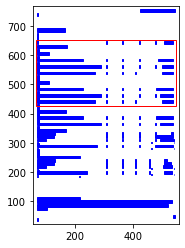

In [21]:
tables = camelot.read_pdf('edge_tol.pdf', flavor='stream')     #the table area that is detected by default.
camelot.plot(tables[0], kind='contour').show()

To improve the detected area, you can increase the edge_tol (default: 50) value to counter the effect of text being placed relatively far apart vertically. Larger edge_tol will lead to longer textedges being detected, leading to an improved guess of the table area. 

<ipython-input-22-b059610e5e6f>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


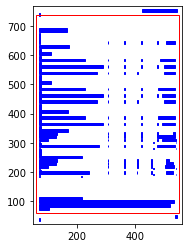

In [22]:
tables = camelot.read_pdf('edge_tol.pdf', flavor='stream', edge_tol=500)
camelot.plot(tables[0], kind='contour').show()

## Detect short lines
There might be cases while using Lattice when smaller lines don’t get detected. The size of the smallest line that gets detected is calculated by dividing the PDF page’s dimensions with a scaling factor called line_scale. By default, its value is 15.

Making line_scale very large (>150) will lead to text getting detected as lines.

<ipython-input-23-f4e9ab01d52c>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='grid').show()


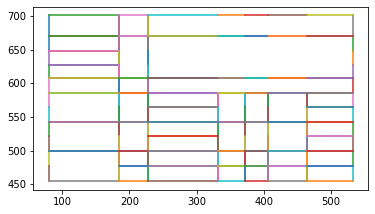

In [23]:
tables = camelot.read_pdf('short_lines.pdf')
camelot.plot(tables[0], kind='grid').show()


the smaller lines separating the headers, couldn’t be detected. Let’s try with line_scale=40, and plot the table again.

<ipython-input-24-b70f902a9f4f>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='grid').show()


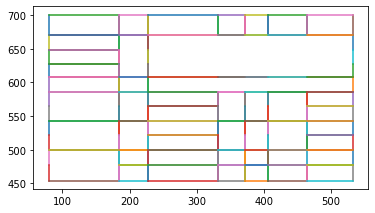

In [24]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40)
camelot.plot(tables[0], kind='grid').show()

In [25]:
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,2400,All the available individuals,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,All the individuals partaking meals in the HH,,,,
5,Blood Pressure #,2400,Men (≥ 18yrs),10%,95%,20%,1728
6,,,Women (≥ 18 yrs),,,,1728
7,Fasting blood glucose,2400,Men (≥ 18 yrs),5%,95%,20%,1825
8,,,Women (≥ 18 yrs),,,,1825
9,Knowledge &\nPractices on HTN &\nDM,2400,Men (≥ 18 yrs),-,-,-,1728


## Shift text in spanning cells
By default, the Lattice method shifts text in spanning cells, first to the left and then to the top, as you can observe in the output table above. However, this behavior can be changed using the shift_text keyword argument.

shift_text expects a list with one or more characters from the following set: ('', l', 'r', 't', 'b'), which are then applied in order. The default, as we discussed above, is ['l', 't'].

Let’s pass shift_text=[''], which basically means that the text will experience weightlessness!

In [26]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=[''])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,2400,,All the available individuals,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,,All the individuals partaking meals in the HH,,,
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,Knowledge &\nPractices on HTN &,2400,Men (≥ 18 yrs),-,-,-,1728


In [27]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=['r', 'b'])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,2400,,,,,All the available individuals
4,Diet survey,1200,,,,,All the individuals partaking meals in the HH
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,,2400,Men (≥ 18 yrs),-,-,-,1728


## Copy text in spanning cells
You can copy text in spanning cells when using Lattice, in either the horizontal or vertical direction, or both. This behavior is disabled by default.
copy_text expects a list with one or more characters from the following set: ('v', 'h'), which are then applied in order.

In [28]:
tables = camelot.read_pdf('copy_text.pdf')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,,,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,,,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


In [29]:
tables = camelot.read_pdf('copy_text.pdf', copy_text=['v'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,4,West Bengal,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,4,West Bengal,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...
